In [1]:
from competing_methods.estimators import competing_estimators
from data_loader import data_loader_
from utils.utils_ import data_stats

from prettytable import PrettyTable
import numpy as np
import pandas as pd

/Users/acsi/Working/RF_survival/Implementations/venv3.9/lib/python3.10/site-packages/xgboost/compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
R[write to console]: Le chargement a nécessité le package : nlme

R[write to console]: Le chargement a nécessité le package : survival



/Users/acsi/Working/RF_survival/Implementations/wildwood_survival/wildwood_survival


R[write to console]: Le chargement a nécessité le package : doParallel

R[write to console]: Le chargement a nécessité le package : foreach

R[write to console]: Le chargement a nécessité le package : iterators

R[write to console]: Le chargement a nécessité le package : parallel

R[write to console]: Le chargement a nécessité le package : rstan

R[write to console]: Le chargement a nécessité le package : StanHeaders

R[write to console]: Le chargement a nécessité le package : ggplot2

R[write to console]: rstan (Version 2.21.2, GitRev: 2e1f913d3ca3)

R[write to console]: For execution on a local, multicore CPU with excess RAM we recommend calling
options(mc.cores = parallel::detectCores()).
To avoid recompilation of unchanged Stan programs, we recommend calling
rstan_options(auto_write = TRUE)



# 1. Data analysis

## Data loading ##

In [2]:
data_list = ["GBSG", "PBCSeq", "simple_simulated_data", "linear_simulated_data", "non_linear_simulated_data"]
datas = data_loader_.load_data(data_list)

## Simulated data

### Simple simulated data

- Dataset is simulated with simple setting

First five observations 
          f0        f1  delta       time
0  4.426056 -2.216435      1  29.994821
1  4.413782 -3.879467      1  28.723029
2  4.376452 -0.964575      1  23.492304
3  5.022796 -1.079252      1  32.529251
4  5.872195 -3.564011      1  32.385512 

Shape of the data  (100, 4) 

Level of censoring is  0.0 % 

Data type 
 f0       float64
f1       float64
delta     uint16
time     float64
dtype: object 

Histogram of randomly selected features


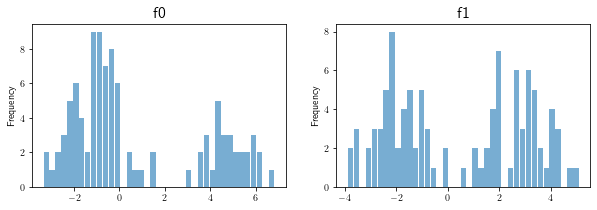

Survival curves


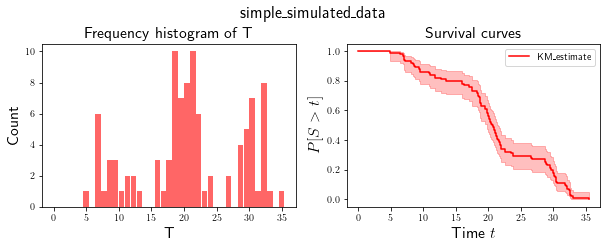

In [3]:
data_name = 'simple_simulated_data'
data_stats(datas, data_name)

### Linear simulated data

- Simulated dataset with the survival time T is sampled according to an exponential Cox model in which the regression term in form linear function.

First five observations 
          f0        f1        f2        f3        f4        f5        f6  \
0 -0.138082  0.201917 -0.772909 -0.304952 -0.653455  0.411203 -0.931894   
1 -0.586980 -0.154614  0.191674  0.679823  0.389273  0.722547  0.174498   
2 -0.701040  0.982987 -0.950559  0.474373 -0.155045 -0.501196 -0.228964   
3 -0.241594 -0.132162  0.051399  0.876672 -0.232460 -0.490396 -0.776288   
4  0.932273  0.831527  0.480271 -0.982967  0.935289  0.439185 -0.959950   

         f7        f8        f9  ...       f42       f43       f44       f45  \
0  0.464602  0.532660 -0.954710  ...  0.422689  0.422078 -0.919511  0.890641   
1  0.879684  0.031683 -0.409464  ...  0.732156  0.004242  0.090775  0.380496   
2 -0.224667 -0.969010 -0.965449  ... -0.042710  0.544584 -0.982388  0.521266   
3  0.622746 -0.496773 -0.504311  ...  0.174923 -0.553573  0.311153 -0.265892   
4 -0.908540 -0.853654 -0.893520  ...  0.816992  0.546677 -0.566352 -0.773509   

        f46       f47       f48       f49 

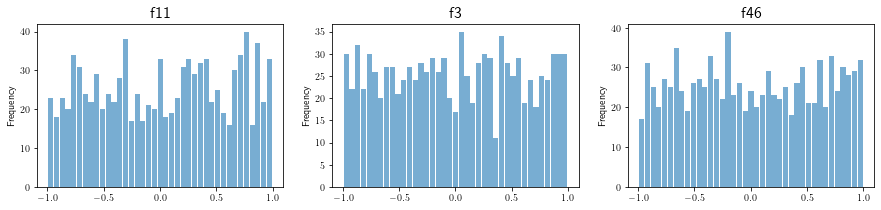

Survival curves


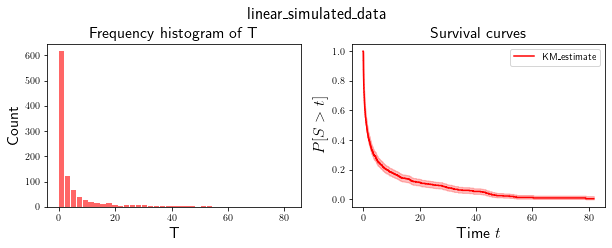

In [4]:
data_name = 'linear_simulated_data'
data_stats(datas, data_name)

### Non linear simulated data

- Simulated dataset with the survival time T is sampled according to an exponential Cox model in which the regression term in form exponential function.

First five observations 
          f0        f1        f2        f3        f4        f5        f6  \
0 -0.332032  0.794221  0.302725  0.077851 -0.159085 -0.024456 -0.705782   
1  0.531311  0.352651  0.180226 -0.039653  0.089861  0.667129  0.789915   
2 -0.435216  0.863401 -0.403898 -0.070498  0.092902  0.732924 -0.814635   
3  0.446431  0.668952 -0.828450 -0.477985  0.651108  0.098880  0.553407   
4 -0.155896  0.578380  0.777072  0.204682 -0.465130 -0.563700 -0.139176   

         f7        f8        f9  ...       f42       f43       f44       f45  \
0 -0.706422 -0.088487 -0.236950  ...  0.964347  0.672638  0.601480  0.218209   
1  0.372852  0.479418  0.102849  ...  0.425258 -0.978026  0.406790  0.460453   
2  0.435331  0.083344 -0.247414  ...  0.027457  0.640363 -0.160361  0.994039   
3  0.440151 -0.277093 -0.417452  ... -0.296418 -0.294601  0.484576 -0.479597   
4  0.451742 -0.646781 -0.034063  ...  0.173492  0.612614 -0.502007  0.049919   

        f46       f47       f48       f49 

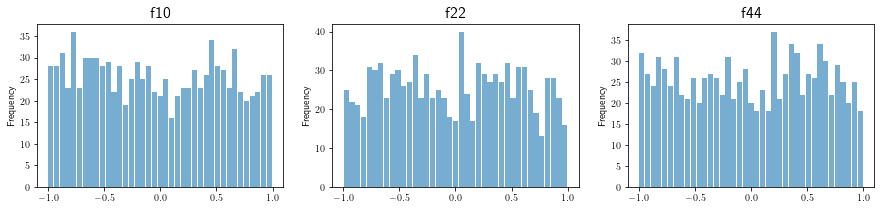

Survival curves


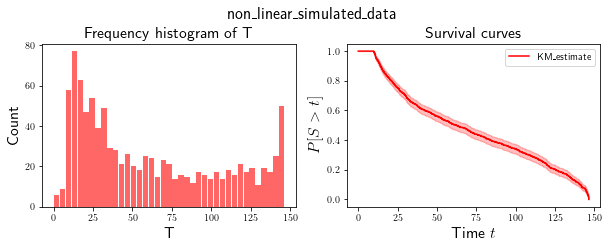

In [5]:
data_name = 'non_linear_simulated_data'
data_stats(datas, data_name)

## Real data

### Mayo Clinic Primary Biliary Cirrhosis

First five observations 
     drug        age  sex  delta       time
0    2.0  58.766838  2.0      1   1.095170
2    2.0  56.447815  2.0      0  14.152338
11   2.0  70.074472  1.0      1   2.770781
15   2.0  54.742087  2.0      1   5.270507
22   1.0  38.106451  2.0      0   4.120578 

Shape of the data  (312, 5) 

Level of censoring is  55.1 % 

Data type 
 drug     float64
age      float64
sex      float64
delta     uint16
time     float64
dtype: object 

Histogram of randomly selected features


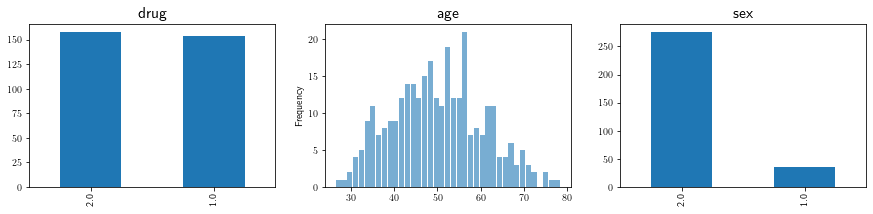

Survival curves


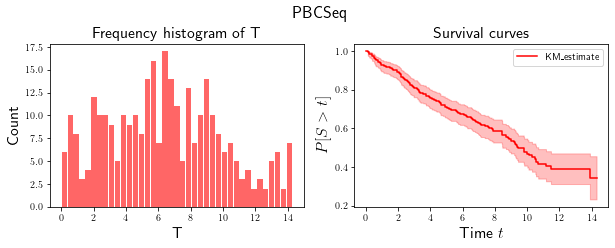

In [6]:
data_name = 'PBCSeq'
data_stats(datas, data_name)

### German Breast Cancer Study Group

First five observations 
     age  estrec  horTh=yes  menostat=Post  pnodes  progrec  tgrade  tsize  \
0  70.0    66.0        0.0            1.0     3.0     48.0       2   21.0   
1  56.0    77.0        1.0            1.0     7.0     61.0       2   12.0   
2  58.0   271.0        1.0            1.0     9.0     52.0       2   35.0   
3  59.0    29.0        1.0            1.0     4.0     60.0       2   17.0   
4  73.0    65.0        0.0            1.0     1.0     26.0       2   35.0   

   delta    time  
0      1  1814.0  
1      1  2018.0  
2      1   712.0  
3      1  1807.0  
4      1   772.0   

Shape of the data  (686, 10) 

Level of censoring is  56.4 % 

Data type 
 age              float64
estrec           float64
horTh=yes        float64
menostat=Post    float64
pnodes           float64
progrec          float64
tgrade             int64
tsize            float64
delta             uint16
time             float64
dtype: object 

Histogram of randomly selected features


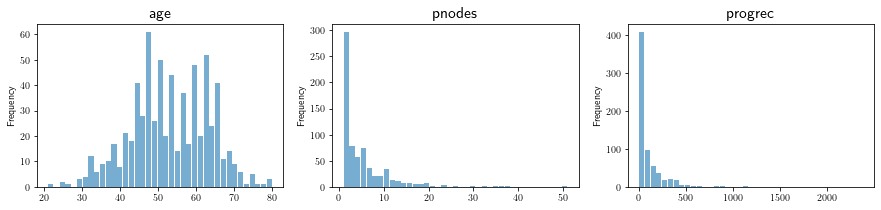

Survival curves


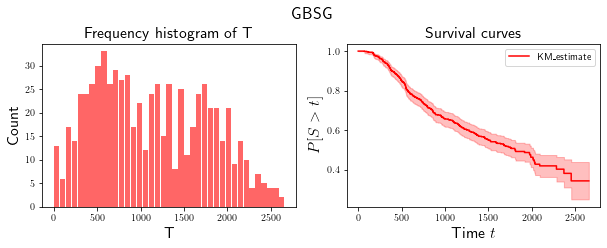

In [7]:
data_name = 'GBSG'
data_stats(datas, data_name)

## 2. Modeling

### Modeling

In [8]:

pt = PrettyTable(['Data', 'Algos', 'C_index', 'time'])
# data loading
# TODO: Not support linear simulated data yet.
data_list = ["GBSG", "PBCSeq", "simple_simulated_data", "non_linear_simulated_data"]
datas = data_loader_.load_data(data_list)
# list of estimator's names
estimators_name = ["SurvivalTree", "RSF", "GBSA", "Cox_PH", "XGBoost"]
# params for estimator
tree_params = {
               "max_depth" : 2, 
               "min_samples_leaf" : 10,
               "n_estimators" : 10
              }
xgboost_params = {'objective': 'survival:aft',
                  'eval_metric': 'aft-nloglik',
                  'aft_loss_distribution': 'normal',
                  'aft_loss_distribution_scale': 1.20,
                  'tree_method': 'hist', 'learning_rate': 0.05,
                  'max_depth': 2}
estimators = competing_estimators(estimators_name, tree_params, xgboost_params)
for data in data_list:
    (X, y) = datas[data]
    perf_stats = estimators.fit(X, y)
    idx = 0
    for name, (running_time, score) in perf_stats.items():
        if idx == (len(estimators_name) // 2):
            pt.add_row([data, name, "%.3f" % score, "%.3f" % running_time])
        else:
            pt.add_row(["", name, "%.3f" % score, "%.3f" % running_time])
        idx += 1
    pt.add_row(["", "", "", ""])

print(pt)

[0]	train-aft-nloglik:8.22677
[1]	train-aft-nloglik:7.48820
[2]	train-aft-nloglik:6.81998
[3]	train-aft-nloglik:6.21552
[4]	train-aft-nloglik:5.66881
[0]	train-aft-nloglik:1.27526
[1]	train-aft-nloglik:1.19659
[2]	train-aft-nloglik:1.12593
[3]	train-aft-nloglik:1.06243
[4]	train-aft-nloglik:1.00534


/Users/acsi/Working/RF_survival/Implementations/venv3.9/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):
/Users/acsi/Working/RF_survival/Implementations/venv3.9/lib/python3.10/site-packages/xgboost/data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[0]	train-aft-nloglik:6.31875
[1]	train-aft-nloglik:5.79110
[2]	train-aft-nloglik:5.31081
[3]	train-aft-nloglik:4.87343
[4]	train-aft-nloglik:4.47491
[0]	train-aft-nloglik:7.38756
[1]	train-aft-nloglik:6.75840
[2]	train-aft-nloglik:6.18916
[3]	train-aft-nloglik:5.67373
[4]	train-aft-nloglik:5.20716
+---------------------------+--------------+---------+-------+
|            Data           |    Algos     | C_index |  time |
+---------------------------+--------------+---------+-------+
|                           | SurvivalTree |  0.047  | 0.650 |
|                           |     RSF      |  0.164  | 0.875 |
|            GBSG           |     GBSA     |  0.061  | 0.719 |
|                           |    Cox_PH    |  0.134  | 0.688 |
|                           |   XGBoost    |  0.034  | 0.500 |
|                           |              |         |       |
|                           | SurvivalTree |  0.008  | 0.637 |
|                           |     RSF      |  0.042  | 0.780 |
|      